# TSME - nieliniowa redukcja wymiarow

In [1]:
from sklearn.datasets import load_digits

X,Y = load_digits(return_X_y=True)

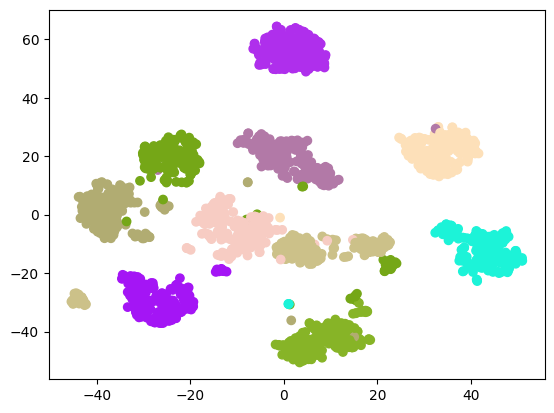

In [2]:
import numpy as np

def rgb_hex(r,g,b):
  return "#{:02x}{:02x}{:02x}".format(r,g,b)

def goldenColors(ncolors):
  cl=[]
  r=255
  g=127
  b=0
  for _ in range(ncolors):
    b=round(((r+g)*0.618)%256)
    g=round(((r+b)*0.618)%256)
    r=round(((b+g)*0.618)%256)
    cl.append(rgb_hex(r,g,b))
  return np.array(cl)

from sklearn.manifold import TSNE, SpectralEmbedding
tsne_2d = TSNE(n_components=2)
X_embedded_2d = tsne_2d.fit_transform(X)

import matplotlib.pyplot as plt

clist = goldenColors(10)
plt.scatter(X_embedded_2d[:,0], X_embedded_2d[:,1], color=clist[Y])


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


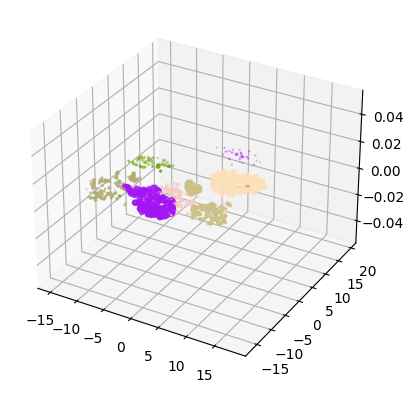

In [3]:
tsne_3d = TSNE(n_components=3)
X_embedded_3d = tsne_3d.fit_transform(X)

fig = plt.figure()
ax=fig.add_subplot(projection='3d')

plt.scatter(X_embedded_3d[:,0], X_embedded_3d[:,1], X_embedded_3d[:,2], color=clist[Y])

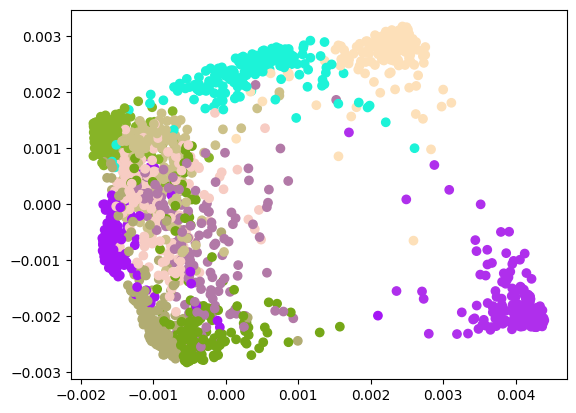

In [4]:
se_2d = SpectralEmbedding(n_components=2)

Xse_2d = se_2d.fit_transform(X)

plt.scatter(Xse_2d[:,0], Xse_2d[:,1], color=clist[Y])

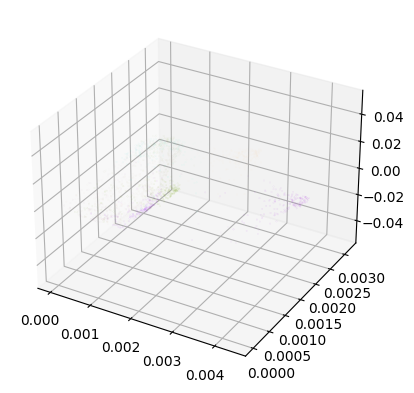

In [5]:
se_3d = SpectralEmbedding(n_components=3)
Xse_3d = se_3d.fit_transform(X)

fig = plt.figure()
ax=fig.add_subplot(projection='3d')

plt.scatter(abs(Xse_3d[:,0]), abs(Xse_3d[:,1]), abs(Xse_3d[:,2]), color=clist[Y])

# Klasteryzacja z cechami kategorycznymi

In [6]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/UM/marketing_campaign.csv", sep='\t')


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = data['Education'].unique()
labels

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [8]:
data


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [10]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
data_edu = pd.get_dummies(data.Education, prefix="Edu")

In [12]:
data_edu

,Edu_2n Cycle,Edu_Basic,Edu_Graduation,Edu_Master,Edu_PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2235,0,0,1,0,0
2236,0,0,0,0,1
2237,0,0,1,0,0
2238,0,0,0,1,0


In [13]:
data_ms = pd.get_dummies(data.Marital_Status, prefix="MS")
data_ms

,MS_Absurd,MS_Alone,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow,MS_YOLO
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
2235,0,0,0,1,0,0,0,0
2236,0,0,0,0,0,1,0,0
2237,0,0,1,0,0,0,0,0
2238,0,0,0,0,0,1,0,0


In [14]:
data_tmp= data.drop(["Education", "Marital_Status", "Dt_Customer", "ID"], axis="columns")
data_tmp

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,46344.0,1,1,38,11,1,6,2,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,4,0,0,0,0,0,0,3,11,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,6,0,0,0,0,0,0,3,11,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,5,0,0,0,0,0,0,3,11,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,6,0,1,0,0,0,0,3,11,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,3,0,0,0,0,0,0,3,11,0


In [15]:
data_fin = pd.concat([data_tmp, data_edu, data_ms], axis=1)
data_fin

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Edu_Master,Edu_PhD,MS_Absurd,MS_Alone,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow,MS_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,1,0,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,1,0,0,0,0,0,0,1,0,0


In [16]:
data_fin.drop(["Edu_2n Cycle", "MS_YOLO"], axis=1)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Edu_Graduation,Edu_Master,Edu_PhD,MS_Absurd,MS_Alone,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,0,0,0,0,1,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,0,0,0,1,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,1,0,0,0,0,0,0,0,1,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,1,0,0,0,0,0,0,0,1,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,1,0,0,0,0,0,1,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,0,1,0,0,0,0,0,1,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,0,1,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,0,1,0,0,0,0,0,0,1,0


In [17]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()

data01 = mns.fit_transform(data_tmp)
data01

array([[0.62135922, 0.08483222, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.59223301, 0.06709518, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.69902913, 0.10509733, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.85436893, 0.08309221, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61165049, 0.10153609, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.59223301, 0.07690815, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

In [18]:
data_fin= pd.DataFrame(data01)
data_fin

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.621359,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.592233,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.699029,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.883495,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,...,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.854369,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.718447,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2236,0.514563,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,...,0.35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2237,0.854369,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,...,0.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2238,0.611650,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,...,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Usuwanie not a Number
data_fin.dropna(inplace=True)

In [20]:
#klasyfikujemy KMeansem
from sklearn.cluster import KMeans
# uzywamy metryk
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
# parametry KMeansa
kmeans_kwargs = {"n_init":10, "random_state":1}

sse=[]
sulhouettes=[]
D_B=[]
C_H=[]

clusters_nu = range(2,21)
for k in clusters_nu:
  km = KMeans(n_clusters = k,**kmeans_kwargs)
  km.fit(data_fin)
  sse.append(km.inertia_)
  D_B.append(davies_bouldin_score(data_fin,km.labels_))
  sulhouettes.append(silhouette_score(data_fin,km.labels_))
  C_H.append(calinski_harabasz_score(data_fin,km.labels_))
  print(k)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


[Text(0.5, 0, '# of clusters'), Text(0, 0.5, 'calinski_harabasz_score')]

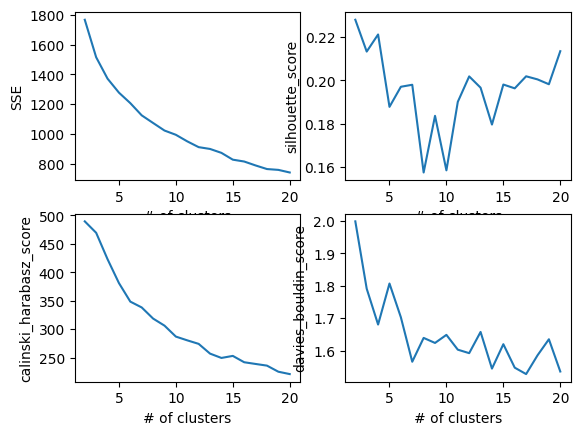

In [21]:
#rysowanie wykresow

import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,2)
ax[0,0].plot(clusters_nu,sse)
ax[0,0].set(xlabel="# of clusters",ylabel="SSE")

ax[1,1].plot(clusters_nu,D_B)
ax[1,1].set(xlabel="# of clusters",ylabel="davies_bouldin_score")

ax[0,1].plot(clusters_nu,sulhouettes)
ax[0,1].set(xlabel="# of clusters",ylabel="silhouette_score")

ax[1,0].plot(clusters_nu,C_H)
ax[1,0].set(xlabel="# of clusters",ylabel="calinski_harabasz_score")

In [22]:
# Z tych wykresow mozna wywnioskowac ze dla 10 klastrow jest  dosc dobrze 
#dlatego zrobimy klasteryzacje metoda KMeansa dla 10 klastrow

km10 = KMeans(n_clusters=10, n_init=10)
#trenujemy model dla 10 klastrow
km10.fit(data_fin)

labels = km10.predict(data_fin)

In [23]:
from sklearn.manifold import TSNE
tsne_2d=TSNE(n_components=2)
X_embeded_2d = tsne_2d.fit_transform(data_fin)


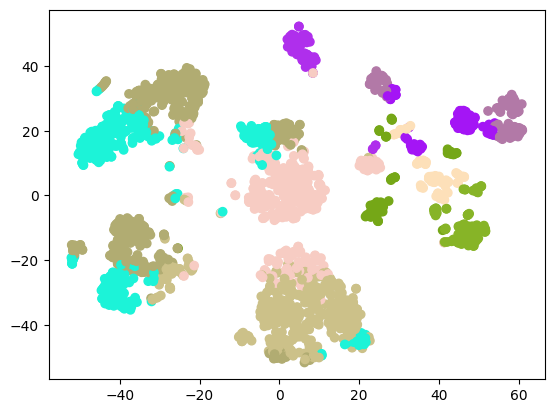

In [24]:
import matplotlib.pyplot as plt
clist =  goldenColors(10)
plt.scatter(X_embeded_2d[:,0],X_embeded_2d[:,1],color=clist[labels])

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


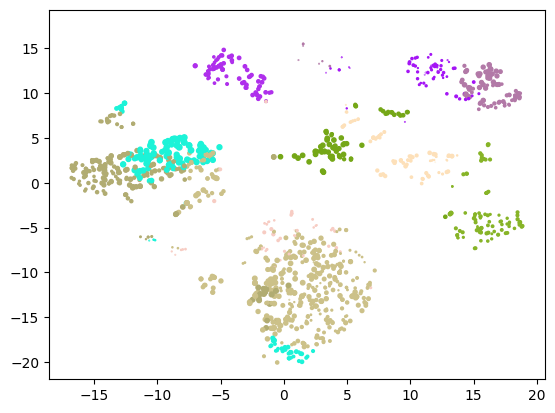

In [25]:
tsne_3d=TSNE(n_components=3)
X_embeded_3d = tsne_3d.fit_transform(data_fin)
clist =  goldenColors(10)
plt.scatter(X_embeded_3d[:,0],X_embeded_3d[:,1],X_embeded_3d[:,2],color=clist[labels])